# Aprendizado não supervisionado - principais técnicas e métodos


### Regra de associação

Regra que visa identificar as relações, até mesmos desconhecidas, dos dados entre si. Uma anedota dessa regra é a relação que descobriram entre pessoas que compram cerveja, também comprarem fraldas. Por meio dela, pôde ser visto essa relação.

Para aferi-la há algumas métricas que podem ser adotadas:

- Suporte:

Frequência com a qual os dados (X e Y, por exemplo) aparecem no conjunto de dados. Seleciona-se o dado e o divide pelo conjunto completo dos dados para compreender a sua frequência. Será considerado frequente se estiver acima do limiar estipulado.

**Importância -** verificar regras que ocorrem por coincindência, bem como eliminar regras (os dados), que com base em suas frequências evidenciam que não são de interesse.

>

**Cálculo :**

`s(X -> Y) = (itemsetX U itemsetY) * Ntransactions - ¹`

Em que *Ntransactions* se refere ao conjunto dos dados totais.

- Confiança:

Mede a frequência que os itens do conjunto Y aparecem em transações que contenham o conjunto X, ou seja, dado que apareceu X, qual é a frequência de que também aparece Y. Se Y aparece de modo significativo, pode-se supor que estejam associados.

**Cálculo :**

`c(X -> Y) = (itemsetX U itemsetY) * itemsetX - ¹`


- Lift:

Mede o grau de associação entre os dados. Por exemplo, colocando Y como target, se seu valor de lift fosse maior que 1, indicaria que a sua ocorrência aumenta a do item X.

>

### Como funciona ?

Primeiro realiza a geração de todas as combinações possíveis dos dados, verificando-se após a frequência deles, como forma de encontrar aqueles que são mais frequentes.

Posteriormente, elabora-se os relacionamentos, buscando identificar se X leva a Y e assim por diante.

>

### Geração dos conjuntos frequentes

Comentei sobre as regras de associação utilizadas, mas pouco disse sobre a geração dos conjuntos. Criar os conjuntos para que por meio deles eu consiga aferir a frequência deles, visando encontrar o nível de associação entre seus termos pode desaguar em elevados custos computacionais.

Nesse sentido, existem algumas formas de, ainda que gere os conjuntos, os custos computacionais não sejam elevados, dentre as quais a utilização do teorema do princípio apriori, que diz: se um conjunto de itens é frequentes, todos os seus subconjuntos também são.

Por meio dele, ao invés de gerarmos todos os conjuntos possíveis, o algoritmo identifica quais possuem maior frequência, gerando-os, otimizando com isso o processo de geração dos conjuntos.

>

### Importante ❗

Os valores encontrados por meio das regras não indicam causalidade, mas sim o nível de co-ocorrência. Nesse sentido, quando utilizo 'dado que X, leva a Y', não significa que quero dizer que um leva ao outro, mas sim, em outras palavras, 'dado a presença de X, qual é a presença de Y ?'. Por meio disso, analisando as frequências de cada quais, consigo depreender o nível de associação entre eles, e não necessariamente causalidade.


In [ ]:
# Importando as bibliotecas:

import pandas as pd

In [ ]:
df = pd.read_csv('/content/Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
df.isna().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [ ]:
df.duplicated().sum()

1620

In [ ]:
df.shape

(20507, 5)

In [ ]:
df[df['Items'] == 'Jam'].head(10)

,TransactionNo,Items,DateTime,Daypart,DayType
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
26,12,Jam,2016-10-30 10:30:14,Morning,Weekend
52,22,Jam,2016-10-30 10:52:15,Morning,Weekend
62,29,Jam,2016-10-30 11:05:30,Morning,Weekend
98,47,Jam,2016-10-30 12:15:29,Afternoon,Weekend
158,75,Jam,2016-10-30 14:32:26,Afternoon,Weekend
185,88,Jam,2016-10-31 09:16:01,Morning,Weekday
257,123,Jam,2016-10-31 11:42:05,Morning,Weekday
265,126,Jam,2016-10-31 11:52:43,Morning,Weekday
373,180,Jam,2016-01-11 08:22:28,Morning,Weekday


### Aplicando as regras de associação


In [ ]:
!pip install mlxtend --upgrade

In [ ]:
df['TransactionNo'].unique()

array([   1,    2,    3, ..., 9682, 9683, 9684])

In [ ]:
# Criando uma lista com todas as transações e seus itens:

transacao = []

for i in df['TransactionNo'].unique():
  lista = list(set(df[df['TransactionNo'] == i]['Items']))

  transacao.append(lista)

transacao[0:5]



[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()

In [ ]:
# Transformando a lista de transações em booleanos:
te_transacao = te.fit(transacao).transform(transacao)

# Visualizando em dataframe o cojunto transformados.
te_df = pd.DataFrame(te_transacao, columns = te.columns_)
te_df


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- Gerando os conjuntos frequentes e aplicando o teorema do príncipio apriori.

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
items_frquentes_apriori = apriori(te_df, use_colnames = True,
                                  min_support = 0.02)

# min_support define o limiar do suporte, a partir do qual
# considera ou desconsidera os termos. Por padrão, utiliza-se
# um valor de 0.3, porém como o conjunto de dados não é grande
# define um valor baixo para mostrar mais dados.

items_frquentes_apriori.sort_values(['support'], ascending = False)

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Bread, Coffee)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Cake, Coffee)"


Essa tabela se refere a geração dos conjuntos frequentes, utilizando em seu processo já a otimização, a qual considera aqueles itens que sejam mais frequentes em detrimento dos que não são.

O support nessa tabela indica a proporção do conjunto de item que faz referência em relação ao conjunto dos dados como um todo. Nesse sentido, observando 'Coffe', compreende-se que ele possui uma proporção de 0.47, comparando com o universo desse conjunto.

- Regras de associação

In [ ]:
from mlxtend.frequent_patterns import association_rules

regras = association_rules(items_frquentes_apriori, metric = 'confidence',
                           min_threshold = 0.5)

regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
1,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
2,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
3,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
4,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
5,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
6,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006


Essa tabela apresenta as regras de associação, de modo que indica a relação que uma vez o antecedente, existir o consequent. Além da confiança, pode-se encontrar o suporte e o lift.

# Agrupamento

In [ ]:
df_beans = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

df_beans.shape

(13611, 17)

In [ ]:
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df_beans.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
print(f' Dados duplicados {df_beans.duplicated().sum()} \n')

percentual = (df_beans.duplicated().sum() / df_beans.shape[0]).round(3)*100

print(f' Percentual dos dados duplicados no dataframe {percentual} %')

 Dados duplicados 68 

 Percentual dos dados duplicados no dataframe 0.5 %


Como a proporção dos dados em relação ao conjunto do dataframe como um todo é pequeno, irei 'dropar' as colunas que sejam duplicadas, criando um novo dataframe no qual não existam.

In [ ]:
df_beans = df_beans.drop_duplicates()

In [ ]:
# Analisando os dados estatísticos do dataframe:

df_beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Observando o dataframe, nota-se que os dados não estão colocados numa mesma escala, o que pode implicar negativamente no agrupamento dos dados. Não obstante, para transformar a escala dos dados, de modo que esses fiquem numa mesma escala (perdão da redundância), preciso normalizá-los ou padronizá-los. Como a normalização é mais robusta a presença de outliers, irei normalizar os dados, de modo que todos possuirão o valor 0 como média, sujeitos a um desvio padrão.

In [ ]:
# Extraindo os valores do dataframe:

X = df_beans.iloc[:, 0:16].values
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981171e-03, 6.16220592e-01, 9.98179623e-01]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_normalizado = scaler.fit_transform(X)

X_normalizado

array([[-0.83879977, -1.13966273, -1.30197615, ...,  2.39827994,
         1.92481096,  0.83867856],
       [-0.82726577, -1.01052862, -1.39116937, ...,  3.09747107,
         2.69144645,  0.77114139],
       [-0.80528652, -1.07530293, -1.24780735, ...,  2.23108594,
         1.8401498 ,  0.91741775],
       ...,
       [-0.37117925, -0.44557909, -0.44700409, ...,  0.28388754,
         0.32988743,  0.38852873],
       [-0.37090706, -0.42481666, -0.42552883, ...,  0.22301752,
         0.24222869,  0.03311486],
       [-0.37049878, -0.38542487, -0.2884744 , ..., -0.13337374,
        -0.28505378,  0.71346236]])

In [ ]:
colunas = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

df_beans_normalizado = pd.DataFrame(X_normalizado, columns = colunas)

df_beans_normalizado

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.838800,-1.139663,-1.301976,-0.632111,-1.565363,-2.182833,-0.839489,-1.060491,0.287981,0.366476,1.420346,1.838628,0.681918,2.398280,1.924811,0.838679
1,-0.827266,-1.010529,-1.391169,-0.435758,-1.972460,-3.685504,-0.824175,-1.041410,0.697598,-0.465886,0.224987,2.497622,0.369552,3.097471,2.691446,0.771141
2,-0.805287,-1.075303,-1.247807,-0.586775,-1.514305,-2.042229,-0.806818,-1.005357,0.577958,0.517614,1.248979,1.764053,0.604373,2.231086,1.840150,0.917418
3,-0.783920,-0.973894,-1.274241,-0.440595,-1.742960,-2.740196,-0.772170,-0.970686,0.671302,-2.248692,0.509588,2.082211,0.403254,2.511258,2.204306,-0.202373
4,-0.779429,-1.093821,-1.375750,-0.268281,-2.121534,-4.535823,-0.782457,-0.963445,0.475476,0.804605,1.872434,2.768598,0.120215,3.267675,3.016333,0.940406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,-0.372608,-0.443833,-0.363307,-0.364498,-0.115589,0.159896,-0.377306,-0.362838,-0.720413,0.683738,0.722866,0.024619,0.263164,0.050155,-0.013718,0.760769
13539,-0.372472,-0.454065,-0.446579,-0.258650,-0.426673,-0.159087,-0.377775,-0.362653,1.024032,0.774149,0.813994,0.356320,0.112342,0.279797,0.321924,0.722442
13540,-0.371179,-0.445579,-0.447004,-0.248110,-0.442403,-0.176913,-0.375262,-0.360891,-0.406580,0.590730,0.753526,0.364089,0.106237,0.283888,0.329887,0.388529
13541,-0.370907,-0.424817,-0.425529,-0.268360,-0.374124,-0.100814,-0.371978,-0.360520,-0.908104,0.142083,0.576435,0.278309,0.143819,0.223018,0.242229,0.033115


### Utilizando o KMeans

In [ ]:
from sklearn.cluster import KMeans

elbow_list = []

for i in range(1,11):
  kmeans_dados = KMeans(n_clusters=i, random_state = 22)
  kmeans_dados.fit(X_normalizado)
  elbow_list.append(kmeans_dados.inertia_)

elbow_list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[216688.0,
 129194.04432617745,
 94331.73465121587,
 75993.19338999815,
 61624.66961769824,
 54900.70240388744,
 48671.44014103337,
 45083.657869637056,
 41904.82466177901,
 39682.146673529816]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Sabe-se que para a construção do cluster via KMeans deve-se passar o hiperparâmetro do número de clusters ou grupos que deseja compreender.

Como o nome sugere, é um hiperparâmetro, que signfica que de antemão deve-se definir um número de grupos, o que não necessariamente é efetivo, uma vez que nem sempre a compreensão da quantidade de grupos presentes é clara.

Nesse sentido, há algum método que pode servir para que consiga-se chegar ao número de clusters, algo que guie, sem que precisa-se seguir de modo completamente aleatório ? Sim, o elbow método, também conhecido como método do cotovelo.

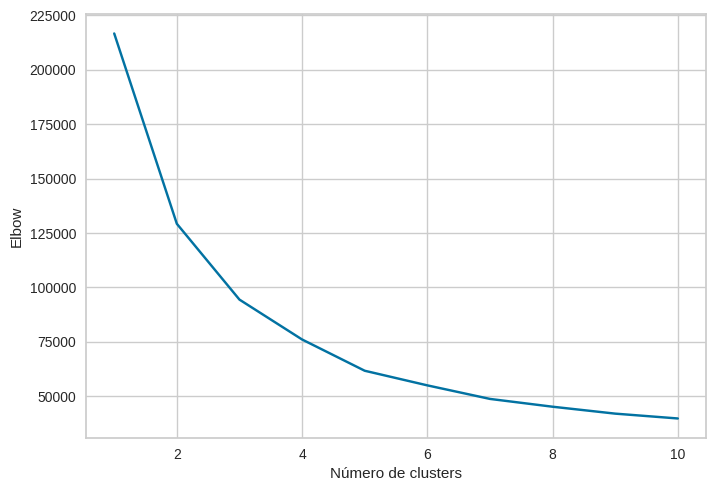

In [ ]:
plt.plot(range(1,11), elbow_list)
plt.xlabel('Número de clusters')
plt.ylabel('Elbow')
plt.show()

Observando o gráfico acima, considerando o método do cotovelo, compreende-se que a quantidade de clusters ideal estaria entorno de 5, justamente por ser o ponto de inflexão no qual a partir dele o gráfico aparenta não ter tanta variação ao longo do eixo x.

- Yellowbrick

Se desejamos ter uma análise gráfica melhor acerca da quantidade de clusters necessária para que o agrupamento, utilizando o KMeans, seja mais efetivo, podemos usar o gráfico oferecido pela biblioteca do KMeans, própria para aplicações voltadas à machine learning.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=7, random_state=22),
                 k=(2, 8))>

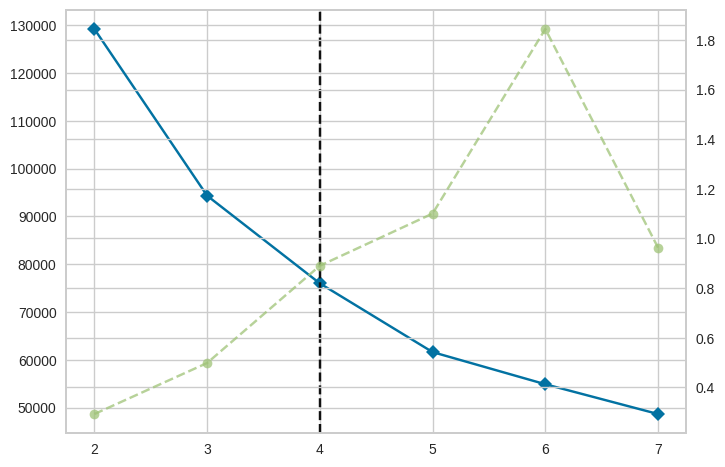

In [ ]:
kmeans_dados_elbow = KMeans(random_state = 22)

grafico = KElbowVisualizer(kmeans_dados_elbow, k = (2,8))

grafico.fit(X_normalizado)
grafico.show

In [ ]:
# Rodando o modelo com o cluster recomendado:
kmeans_dados_final = KMeans(n_clusters = 4, random_state = 22)

rotulos_kmeans_final = kmeans_dados_final.fit_predict(X_normalizado)

rotulos_kmeans_final

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Criando um dataframe com os rótulos gerados pelo K-Means:
labels_df = pd.DataFrame(rotulos_kmeans_final, columns = ['labels'])

In [ ]:
# Verificando os rótulos gerados.
# Como não poderia ser diferente,
# há 4 rótulos.
labels_df.labels.unique()

array([2, 0, 3, 1], dtype=int32)

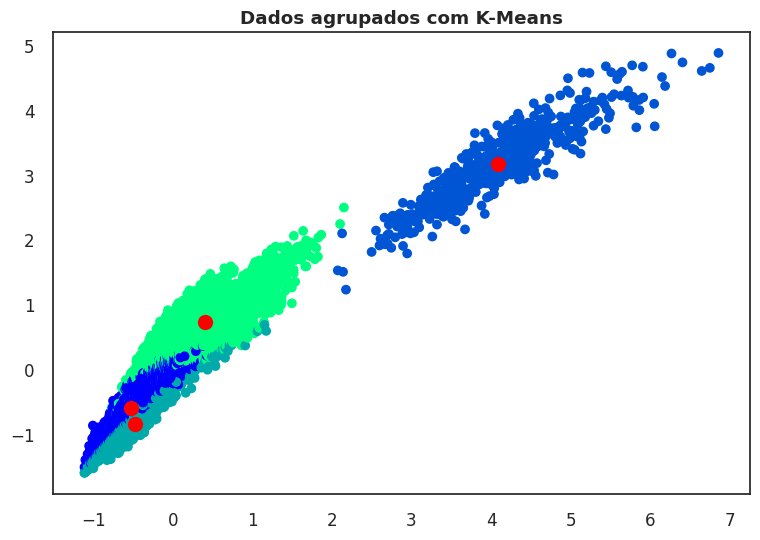

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Visualizando graficamente:

sns.set(style = 'white', rc = {'figure.figsize' : (9,6)}, font_scale = 1.1)

# Plot dos agrupamentos:
plt.scatter(x = X_normalizado[:, 0], y =  X_normalizado[:, 2],
            c = rotulos_kmeans_final, cmap = 'winter')

# Plot dos centroides:
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0],
            kmeans_dados_final.cluster_centers_[:, 2],
            s = 100, c = 'red')

plt.title('Dados agrupados com K-Means', fontweight = 'bold')
plt.figure(figsize = (15,10))
plt.show()

### Métricas de avaliação do modelo

Existem duas principais métricas utilizadas para avaliar o modelo de machine learning não supervisionado, sendo a inércia e a silhueta.

A inércia é a soma da distância quadrada de cada ponto ao centro do cluster a que pertence. Desse modo, valores menores indicam uma menor distância dos clusters ao seu centro, podendo informar que dessa forma os clusters estão melhor agrupados.

Por outro lado, mede a similaridade de seu ponto ao seu próprio cluster em comparação com outros clusters, variando sob um intervalo de 1 a -1. O ponto 1 indica que os dados estão muito bem agrupados.

In [ ]:
from sklearn.metrics import silhouette_score

# Calcula o Silhouette Score
pontuacao_silhueta = silhouette_score(X_normalizado, rotulos_kmeans_final)

print(f"Silhouette Score: {pontuacao_silhueta.round(3)} \n")
print(f'{elbow_list}')

Silhouette Score: 0.342 

[216688.0, 129194.04432617745, 94331.73465121587, 75993.19338999815, 61624.66961769824, 54900.70240388744, 48671.44014103337, 45083.657869637056, 41904.82466177901, 39682.146673529816]


Os valores da lista abaixo indicam a pontuação evidenciada pela inérica. Nota-se que no primeiro momento a pontuação é alta, evidenciando que os clusters ainda estão distantes de seu respectivo centróide, de modo que a cada quantidade de clusters diminuem.

Relembrando novamente o gráfico o ponto no qual há o cotovelo apresenta a pontuação de aproximadamente 75993.

Observando o gráfico gerado, é possível perceber que os dados estão escalonados, ainda que o eixo y seja um pouco diferente do eixo x, na mesma forma em que nota-se visualmente a presença dos 4 grupos diferentes, inclusive os centróides no centro de cada grupo.

### Mean-Shift

Técnica de agrupamento iterativo que desloca cada centróide para a média dos pontos no qual há a maior densidade dos dados em uma região. A compreensão da densidade por região, se dá mediante a uma 'janela' que definimos o seu raio por meio de um hiperparâmetro.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# Estimando a janela que irá percorrer os dados,
# a qual terá a função de definir um escopo no qual
# 'compreende' a densidade dos dados (ver anotação
# no meu Notion )

# Desse modo, eu defino o seu tamanho com base
# no intervalo e densidade dos dados normalizados,
# sem que eu precise definir de modo arbitrário.
bw = estimate_bandwidth(X_normalizado)

In [ ]:
import numpy as np

In [ ]:
meanshift = MeanShift(bandwidth=bw).fit(X_normalizado)

In [ ]:
# Extraindo os rótulos gerados por esse modelo
# de clusterização:
rotulos_meanshift = meanshift.labels_

# Encontrando a quantidade dos rótulos no conjunto
# de dados.
numero_rotulos = len(np.unique(rotulos_meanshift))
print(f' O modelo identificou {numero_rotulos} grupos. ')


 O modelo identificou 4 grupos. 


In [ ]:
cluster_centers = meanshift.cluster_centers_

# Exemplo dos dados que são encontrados
# no grupo 2.
cluster_centers[2]

array([ -0.61665961,  -0.17863423,  -0.71761589,  -0.46005348,
        -0.64803608,  -0.42766108,  -0.52863014,  -0.71094566,
        -0.77106942, -14.6037239 ,  -3.63014377,   0.25976968,
         0.73956706,   0.51528008,   0.2233578 , -10.90300394])

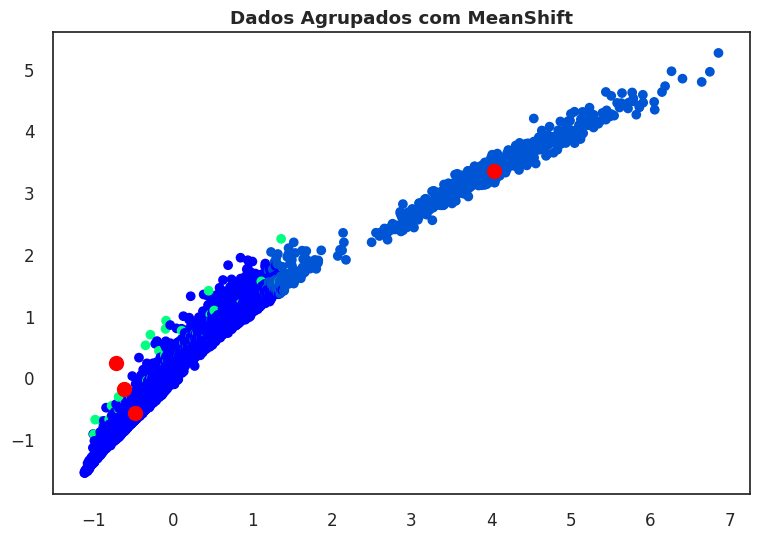

<Figure size 1000x1500 with 0 Axes>

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:, 1], c=rotulos_meanshift, cmap='winter')

#plot dos centroides
plt.scatter(meanshift.cluster_centers_[:, 0],
            meanshift.cluster_centers_[:, 1],
            s=100,
            c='red')

plt.title('Dados Agrupados com MeanShift',fontweight='bold')
plt.figure(figsize = (10,15))
plt.show()

Gráfico dos dados agrupados, por meio do Mean-Shift, o qual concebe que há 4 grupos.

### Avaliação do modelo:

In [ ]:
# Calcula o Silhouette Score
pontuacao_silhueta = silhouette_score(X_normalizado, rotulos_meanshift)

print(f"Silhouette Score: {pontuacao_silhueta.round(3)} \n")

Silhouette Score: 0.496 



Analisando o silhoutte score do Mean-Shift em comparação com o K-Means, nota-se que o primeiro apresentou uma melhora em relação ao segundo.

## DBSCan

Técnica baseada na densidade dos dados com ruído, de modo que agrupa os dados por meio de uma densidade, os quais são inscritos numa forma esférico de raio epsilon.

Desse modo, o algoritmo passa em todos os dados agrupando-os conforme a sua densidade entorno de uma área, definia com base no raio. Os dados que não são inscritos na fronteira do cluster ou que não estão inscritos no de outros quaisquer são tidos como ruídos, normalmente referente aos outliers do modelo.

Aqui, ao contrário do Mean-Shift, os centróides são os próprios pontos dos dados.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# realizar varios testes com os parametros `eps` e `min_samples`

dbscan = DBSCAN(eps=1.2, min_samples=10)

In [ ]:
dbscan_dados = dbscan.fit(X_normalizado)

In [ ]:
rotulos_dbscan = dbscan_dados.labels_

numero_rotulos = len(np.unique(rotulos_dbscan))
numero_rotulos

3

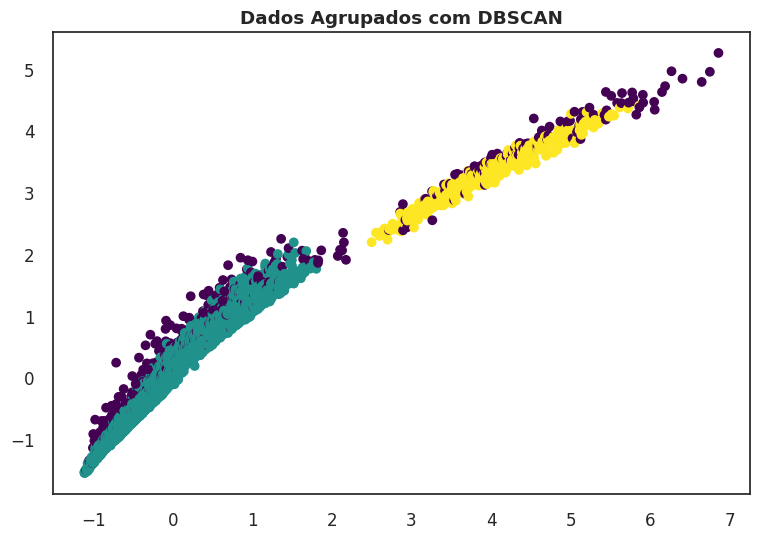

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:, 1], c=rotulos_dbscan, cmap='viridis')

plt.title('Dados Agrupados com DBSCAN',fontweight='bold')
plt.show()

In [ ]:
# Calcula o Silhouette Score
pontuacao_silhueta = silhouette_score(X_normalizado, rotulos_dbscan)

print(f"Silhouette Score: {pontuacao_silhueta.round(3)} \n")

Silhouette Score: 0.417 

